In [1]:
from math import sin, cos
import numpy as np
from numpy import pi as π
from numpy.random import randn
from numpy.linalg import svd

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

In [2]:
x_c = [2.0, 1.0]  # Center of data (mean)
σ = [2.0, 0.5]  # Principal axes

# Rotate cloud by π/3 (160 degrees)
θ = π/3          
R = np.array([
    [cos(θ), -sin(θ)], # Rotation matrix
    [sin(θ),  cos(θ)]
])

# Create 10,000 points
npoints = 10_000            
X = R @ np.diag(σ) @ randn(2, npoints) + np.diag(x_c) @ np.ones((2, npoints))


## f_ch01_ex03_1b

# This seems to be mean centring along rows to give average column - seems back to front
# But the data is that way up, with one column per sample instead of one row per sample
Xavg = X.mean(axis=1)
B = X - Xavg[:, np.newaxis]

# Find principal components (SVD)
U, S, VT = svd(B / np.sqrt(npoints), full_matrices=False)
Σ = np.diag(S)

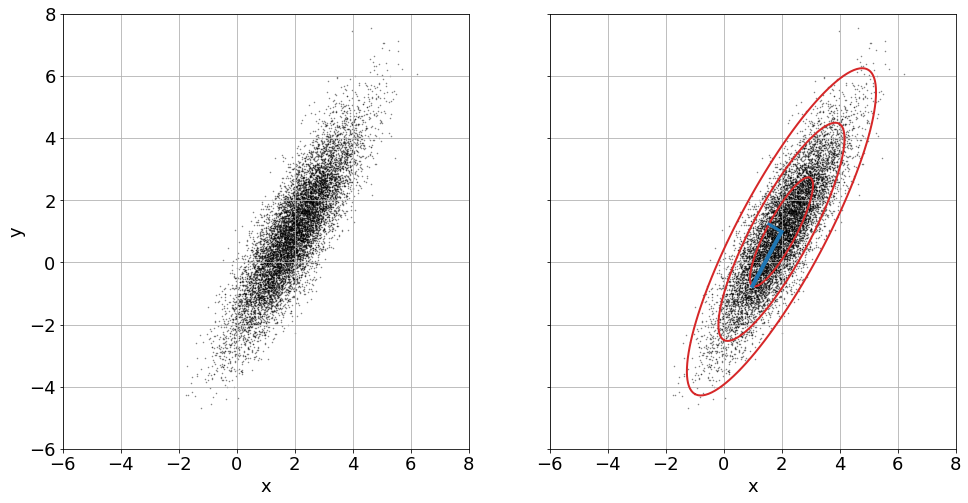

In [3]:
# Figure 1.13

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(16, 8))

axs[0].scatter(
    X[0], X[1],
    s=1, color='black', marker='.', alpha=0.5
)
axs[0].grid(True)
axs[0].set_xlim((-6, 8))
axs[0].set_ylim((-6, 8))
axs[0].set_ylabel('y')
axs[0].set_xlabel('x')

axs[1].scatter(
    X[0], X[1],
    s=1, color='black', marker='.', alpha=0.5
)   # Plot data to overlay PCA

axs[1].grid(True)
axs[1].set_xlim((-6, 8))
axs[1].set_ylim((-6, 8))

# 1-std confidence interval
θ = np.arange(0, 2*π, 0.05)
Xstd = U @ Σ @ np.array([np.cos(θ), np.sin(θ)])

axs[1].plot(Xavg[0] +   Xstd[0], Xavg[1] +   Xstd[1], '-', color='C3', linewidth=2)
axs[1].plot(Xavg[0] + 2*Xstd[0], Xavg[1] + 2*Xstd[1], '-', color='C3', linewidth=2)
axs[1].plot(Xavg[0] + 3*Xstd[0], Xavg[1] + 3*Xstd[1], '-', color='C3', linewidth=2)

# Plot principal components U[:, 0] S[0] and U[:, 1] S[1]
axs[1].plot(
    np.array([Xavg[0], Xavg[0] + U[0, 0] * S[0]]),
    np.array([Xavg[1], Xavg[1] + U[1, 0] * S[0]]),
    '-', color='C0', linewidth=4
)
axs[1].plot(
    np.array([Xavg[0], Xavg[0] + U[0, 1] * S[1]]),
    np.array([Xavg[1], Xavg[1] + U[1, 1] * S[1]]),
    '-', color='C0', linewidth=3
)
axs[1].set_xlabel('x');

In [4]:
# Recover the scales and rotation
assert np.allclose(S, σ, rtol=0.02)

assert np.allclose(
    U * np.sign(U[0]) / np.sign(R[0]),
    R,
    rtol=0.01
) 